<a href="https://www.kaggle.com/code/wuttipats/us-birth-rates-eda-with-sql?scriptVersionId=131557528" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# US birth rates EDA with SQL 👶

<span style="color: gray">"Exploratory data analysis on  US birth data using Structured Query Language (SQL)"</span>

* **Created By:** Wuttipat S.
* **Created Date:** 2023-05-30
* **Status:** <span style="background-color: green; color: white; font-weight: bold">Completed</span>


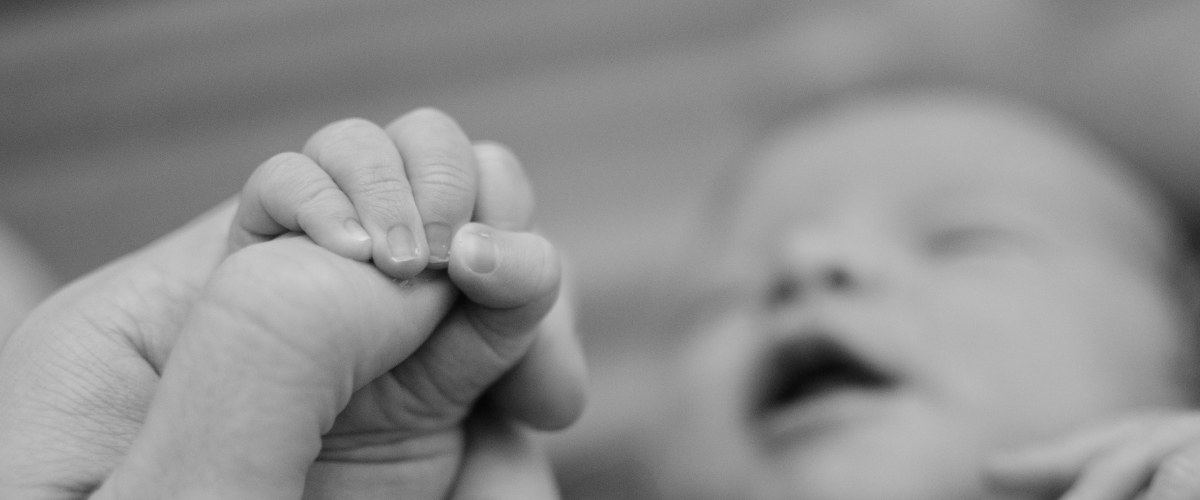
> photo by canva

# Notebook Odjective
---
This notebook purpose is using **Structured Query Language(SQL)** to perform these analysis tasks as much as possible:
- Data Cleaning
- Data Validation
- Exploratory Data Analysis (EDA)
- Summary an insights

# About Dataset
---
## Introduction
This dataset provides birth rates and related data across the 50 states and DC from 2016 to 2021. The data was sourced from the Centers for Disease Control and Prevention (CDC) and includes detailed information such as number of births, gender, birth weight, state, and year of the delivery. A particular emphasis is given to detailed information on the mother's educational level. With this dataset, one can, for example, examine trends and patterns in birth rates across different academic groups and geographic locations.


### Origin
The data in this dataset was obtained using CDC's WONDER retrieval tool on the CDC Natality page

### Column Descriptions
* State ➡️ state name in full (includes District of Columbia)
* State Abbreviation ➡️ 2-character state abbreviation
* Year ➡️ 4-digit year
* Gender ➡️ Gender of baby
* Education Level of Mother ➡️ See table below
* Education Level Code ➡️ See table below
* Number of Births ➡️ Number of births for the category
* Average Age of Mother (years) ➡️ Mother's average age in the category
* Average Birth Weight (g) ➡️ Average birth weight in the category

### Education levels and codes used in dataset
Code	Mother's Education Level
* 1	8th grade or less
* 2	9th through 12th grade with no diploma
* 3	High school graduate or GED completed
* 4	Some college credit, but not a degree
* 5	Associate degree (AA, AS)
* 6	Bachelor's degree (BA, AB, BS)
* 7	Master's degree (MA, MS, MEng, MEd, MSW, MBA)
* 8	Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, LLB, JD)
* -9	Unknown or Not Stated


![](https://www.pngitem.com/pimgs/b/508-5089961_text-decoration-png.png)

# Step 1: Import the Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')


# Step 2: Load the Dataset

In [2]:
df = pd.read_csv('/kaggle/input/temporary-us-births/us_births_2016_2021.csv')
df.head()

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3


# Step 3: Create a SQLite Database
Now, let's create a SQLite database and use pandas DataFrame `to_sql()` method to write records stored in a DataFrame to our SQLite database.

In [3]:
import sqlite3

# Create a new SQLite database 
conn = sqlite3.connect('births.db')

# Write the data to a SQLite table name 'births'
df.to_sql('births', conn, if_exists='replace', index=False)


5496

# Step 4: Test Connection and SQL Query
Make a test to ensure everything works fine by executing a simple SQL query.

In [4]:
test_df = pd.read_sql('SELECT * FROM births LIMIT 5;', conn)
test_df.head()

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3


# Step 5: Data Preparation

> **Note**: 
> - `pd.read_sql()` is designed for executing `SELECT` statements and returning the result as a DataFrame. It's not designed to handle data manipulation language (DML) statements such as UPDATE.
> - To execute an `UPDATE`, `INSERT` or `DELETE` statement, you need to use the appropriate function from your database connector (sqlite3, psycopg2, etc.).
> - This require to connection only one times.

First, a cursor object is created using the `cursor()` method of the database connection `conn`. 

In [5]:
cursor = conn.cursor() # Run this once is enough

A series of `ALTER TABLE` statements are executed using the `execute()` method of the cursor object. 

In [6]:
cursor.execute('ALTER TABLE births RENAME COLUMN "State" TO "state"')
cursor.execute('ALTER TABLE births RENAME COLUMN "State Abbreviation" TO "state_abbreviation"')
cursor.execute('ALTER TABLE births RENAME COLUMN "Year" TO "year"')
cursor.execute('ALTER TABLE births RENAME COLUMN "Gender" TO "gender"')
cursor.execute('ALTER TABLE births RENAME COLUMN "Education Level of Mother" TO "education_level_of_mother"')
cursor.execute('ALTER TABLE births RENAME COLUMN "Education Level Code" TO "education_level_code"')
cursor.execute('ALTER TABLE births RENAME COLUMN "Number of Births" TO "number_of_births"')
cursor.execute('ALTER TABLE births RENAME COLUMN "Average Age of Mother (years)" TO "average_age_of_mother_years"')
cursor.execute('ALTER TABLE births RENAME COLUMN "Average Birth Weight (g)" TO "average_birth_weight_g"')

conn.commit()

An `UPDATE` statement is executed using the `execute()` method of the cursor object.

In [7]:
original = pd.read_sql('SELECT DISTINCT education_level_of_mother FROM births', conn)

In [8]:
cursor.execute('''
UPDATE births
SET education_level_of_mother = 
    CASE
        WHEN education_level_of_mother = 'Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, LLB, JD)' THEN 'Doctorate or Professional Degree'
        WHEN education_level_of_mother = 'Master''s degree (MA, MS, MEng, MEd, MSW, MBA)' THEN 'Master''s Degree'
        WHEN education_level_of_mother = 'Bachelor''s degree (BA, AB, BS)' THEN 'Bachelor''s Degree'
        WHEN education_level_of_mother = 'Associate degree (AA, AS)' THEN 'Associate Degree'
        WHEN education_level_of_mother = 'Some college credit, but not a degree' THEN 'Some College Credit'
        WHEN education_level_of_mother = 'High school graduate or GED completed' THEN 'High School Graduate'
        WHEN education_level_of_mother = '9th through 12th grade with no diploma' THEN '9th-12th Grade with No Diploma'
        WHEN education_level_of_mother = '8th grade or less' THEN '8th Grade or Less'
        WHEN education_level_of_mother = 'Unknown or Not Stated' THEN 'Unknown'
        ELSE education_level_of_mother
    END;
    ''')
conn.commit()


In [9]:
tranformed = pd.read_sql('SELECT DISTINCT education_level_of_mother FROM births', conn)

In [10]:
pd.DataFrame({'original': original.education_level_of_mother, 'tranformed': tranformed.education_level_of_mother})

,original,tranformed
0,8th grade or less,8th Grade or Less
1,9th through 12th grade with no diploma,9th-12th Grade with No Diploma
2,High school graduate or GED completed,High School Graduate
3,"Some college credit, but not a degree",Some College Credit
4,"Associate degree (AA, AS)",Associate Degree
5,"Bachelor's degree (BA, AB, BS)",Bachelor's Degree
6,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",Master's Degree
7,"Doctorate (PhD, EdD) or Professional Degree (M...",Doctorate or Professional Degree
8,Unknown or Not Stated,Unknown


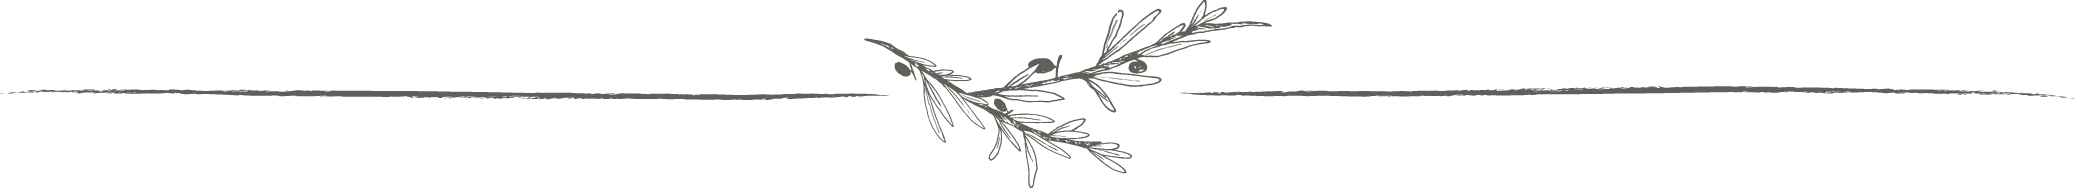

# Step 6: Data Cleaning & Data Validation
- Check *table info*
- Check *missing* values and remove if it exist.
- Check *duplicated* values and remove if it exist.
- Check *outlier, data types* and *spelling.*

### Table Info

In [11]:
# Get number of rows
query = "SELECT COUNT(*) as num FROM births;"
result = pd.read_sql(query, conn)
number_of_rows = result['num'].values[0]

# Get number of columns
query = "PRAGMA table_info(births);"
result = pd.read_sql(query, conn)
number_of_columns = len(result)

print(f"The table 'births' has {number_of_rows} rows and {number_of_columns} columns.")


The table 'births' has 5496 rows and 9 columns.


In [12]:
query = "PRAGMA table_info(births);"
tables_info = pd.read_sql(query, conn,)
tables_info

,cid,name,type,notnull,dflt_value,pk
0,0,state,TEXT,0,None,0
1,1,state_abbreviation,TEXT,0,None,0
2,2,year,INTEGER,0,None,0
3,3,gender,TEXT,0,None,0
4,4,education_level_of_mother,TEXT,0,None,0
5,5,education_level_code,INTEGER,0,None,0
6,6,number_of_births,INTEGER,0,None,0
7,7,average_age_of_mother_years,REAL,0,None,0
8,8,average_birth_weight_g,REAL,0,None,0


### Check missing values

In [13]:
missing = pd.read_sql('''
    SELECT
    SUM(CASE WHEN state IS NULL THEN 1 ELSE 0 END) AS MissingState,
    SUM(CASE WHEN state_abbreviation IS NULL THEN 1 ELSE 0 END) AS MissingStateAbbreviation,
    SUM(CASE WHEN year IS NULL THEN 1 ELSE 0 END) AS MissingYear,
    SUM(CASE WHEN gender IS NULL THEN 1 ELSE 0 END) AS MissingGender,
    SUM(CASE WHEN education_level_of_mother IS NULL THEN 1 ELSE 0 END) AS MissingEducationLevelOfMother,
    SUM(CASE WHEN education_level_code IS NULL THEN 1 ELSE 0 END) AS MissingEducationLevelCode,
    SUM(CASE WHEN number_of_births IS NULL THEN 1 ELSE 0 END) AS MissingNumberOfBirths,
    SUM(CASE WHEN average_age_of_mother_years IS NULL THEN 1 ELSE 0 END) AS MissingAverageAgeOfMotherYears,
    SUM(CASE WHEN average_birth_weight_g IS NULL THEN 1 ELSE 0 END) AS MissingAverageBirthWeightG
    FROM births;
    ''', conn)

missing

,MissingState,MissingStateAbbreviation,MissingYear,MissingGender,MissingEducationLevelOfMother,MissingEducationLevelCode,MissingNumberOfBirths,MissingAverageAgeOfMotherYears,MissingAverageBirthWeightG
0,0,0,0,0,0,0,0,0,0


### Check duplicates

In [14]:
duplicates = pd.read_sql('''
SELECT state, state_abbreviation, year, gender, education_level_of_mother, education_level_code, number_of_births, average_age_of_mother_years, average_birth_weight_g
FROM births
GROUP BY state, state_abbreviation, year, gender, education_level_of_mother, education_level_code, number_of_births, average_age_of_mother_years, average_birth_weight_g
HAVING COUNT(*) > 1;
''', conn)

duplicates

,state,state_abbreviation,year,gender,education_level_of_mother,education_level_code,number_of_births,average_age_of_mother_years,average_birth_weight_g


### Validate across every columns

- *distinct_states*

In [15]:
query = '''
SELECT 
    COUNT(DISTINCT state) AS distinct_states,
    COUNT(DISTINCT state_abbreviation) AS distinct_state_abbreviations
FROM births;
'''
pd.read_sql(query, conn)

,distinct_states,distinct_state_abbreviations
0,51,51


* *year*

In [16]:
query = '''SELECT DISTINCT year FROM births'''
display(pd.read_sql(query, conn))

,year
0,2016
1,2017
2,2018
3,2019
4,2020
5,2021


- *gender*

In [17]:
query = '''SELECT DISTINCT gender FROM births'''
display(pd.read_sql(query, conn))

,gender
0,F
1,M


- *education_level_of_mother*

In [18]:
query = '''SELECT DISTINCT education_level_of_mother, education_level_code FROM births'''
pd.read_sql(query, conn)

,education_level_of_mother,education_level_code
0,8th Grade or Less,1
1,9th-12th Grade with No Diploma,2
2,High School Graduate,3
3,Some College Credit,4
4,Associate Degree,5
5,Bachelor's Degree,6
6,Master's Degree,7
7,Doctorate or Professional Degree,8
8,Unknown,-9


- *number_of_births*

In [19]:
query = '''
SELECT 
    MIN(number_of_births),
    MAX(number_of_births)
FROM births;
'''
pd.read_sql(query, conn)

,MIN(number_of_births),MAX(number_of_births)
0,10,59967


- *average_age_of_mother_years*

In [20]:
query = '''
SELECT 
    MIN(average_age_of_mother_years),
    MAX(average_age_of_mother_years)
FROM births;
'''
pd.read_sql(query, conn)

,MIN(average_age_of_mother_years),MAX(average_age_of_mother_years)
0,23.1,35.5


- *average_birth_weight_g*

In [21]:
query = '''
SELECT 
    MIN(average_birth_weight_g),
    MAX(average_birth_weight_g)
FROM births;
'''
pd.read_sql(query, conn)

,MIN(average_birth_weight_g),MAX(average_birth_weight_g)
0,2451.9,3585.7


> After we cleaning and validating data this is result:
> - The dataset has 5496 rows and 9 columns.
> - Checking each columns

|   | Column name                 | Data type | Missing value | Details                      |
|---|-----------------------------|-----------|---------------|------------------------------|
| 0 |                       state |      TEXT |          None | 51 states                    |
| 1 |          state_abbreviation |      TEXT |          None | 51 states                    |
| 2 |                        year |   INTEGER |          None | Form 2016-2021               |
| 3 |                      gender |      TEXT |          None | Male or Female               |
| 4 |   education_level_of_mother |      TEXT |          None | 9 indentical levels          |
| 5 |        education_level_code |   INTEGER |          None | From 1 to 8, (-9) as unknown |
| 6 |            number_of_births |   INTEGER |          None | Range 10 to 59967            |
| 7 | average_age_of_mother_years |      REAL |          None | Range 23.1 to 35.5           |
| 8 |      average_birth_weight_g |      REAL |          None | Range 2451.9 to 3585.7       |

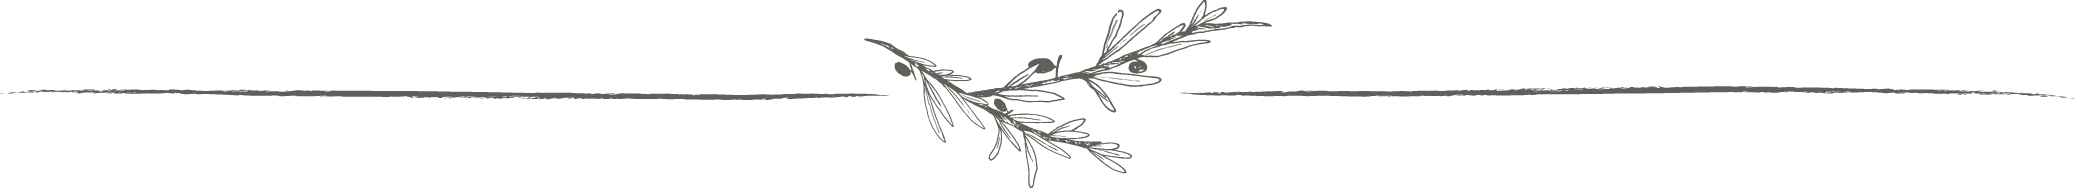

# Step 7: Start Exploratory Data Analysis

1. What is the total number of birth across years between male and female baby?
1. What is distribution of weight across gender?
1. What is the average birth weight across education level of mother?
1. Which state have highest births across year?
1. What is the average age of mothers per education level?


### 1. What is the average birth rate across years between male and female baby?


In [22]:
query = 'SELECT year, gender, SUM(number_of_births) FROM births GROUP BY year, gender'
sum_birth_across_year = pd.read_sql(query, conn)
sum_birth_across_year

,year,gender,SUM(number_of_births)
0,2016,F,1927676
1,2016,M,2018177
2,2017,F,1882608
3,2017,M,1972871
4,2018,F,1853528
5,2018,M,1938179
6,2019,F,1830085
7,2019,M,1917446
8,2020,F,1765547
9,2020,M,1848086


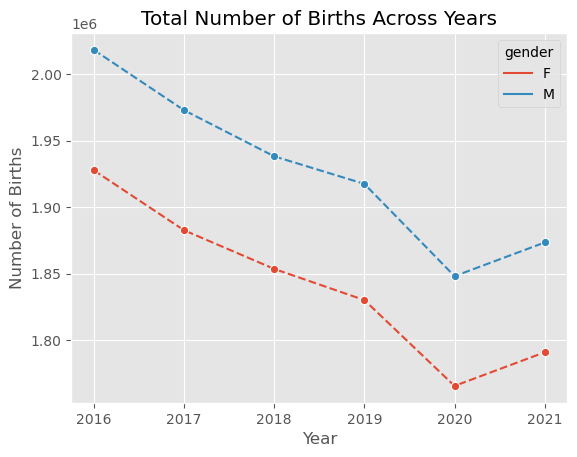

In [23]:
sns.lineplot(data=sum_birth_across_year, x='year', y='SUM(number_of_births)', hue='gender', marker='o', linestyle='dashed')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.title('Total Number of Births Across Years')
plt.show()

> - From the plot, there are negative correlation between number of births and year. 
> - Althrough in 2021 the number slightly going up, but overall this is downside trend.

### 2. What is distribution of weight across gender?

In [24]:
query = '''
SELECT gender, average_birth_weight_g
FROM births
'''

avg_weight = pd.read_sql(query, conn)
avg_weight

,gender,average_birth_weight_g
0,F,3116.9
1,F,3040.0
2,F,3080.0
3,F,3121.9
4,F,3174.3
...,...,...
5491,M,3261.1
5492,M,3286.0
5493,M,3249.3
5494,M,3262.0


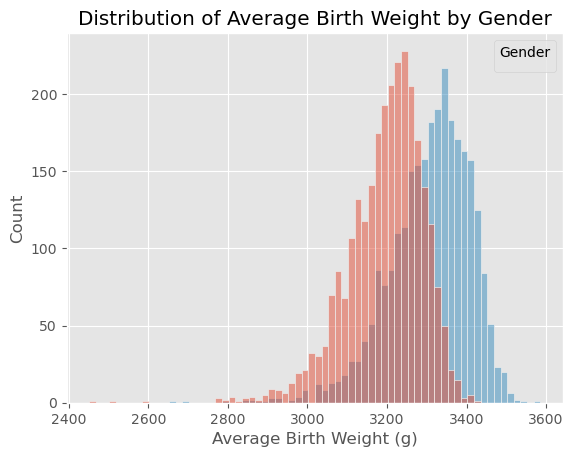

In [25]:
sns.histplot(data=avg_weight, hue='gender', x='average_birth_weight_g')

plt.xlabel('Average Birth Weight (g)')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.title('Distribution of Average Birth Weight by Gender')

# Display the plot
plt.show()



> - The histogram reveals that the average weight of newborns follows a roughly normal distribution for both males and females. 
> - However, upon closer examination, the graph exhibits a slight left skew, suggesting that underweight babies are born more frequently than overweight ones.

### 3. What is the average birth weight across education level of mother?



In [26]:
avg_birth_weight_across_mother_edu = pd.read_sql('''
    SELECT education_level_of_mother, gender, average_birth_weight_g
    FROM births
    WHERE education_level_of_mother != 'Unknown'
    ORDER BY education_level_code DESC
''', conn)

avg_birth_weight_across_mother_edu.head()

,education_level_of_mother,gender,average_birth_weight_g
0,Doctorate or Professional Degree,F,3196.7
1,Doctorate or Professional Degree,M,3368.4
2,Doctorate or Professional Degree,F,3230.8
3,Doctorate or Professional Degree,M,3313.8
4,Doctorate or Professional Degree,F,3242.2


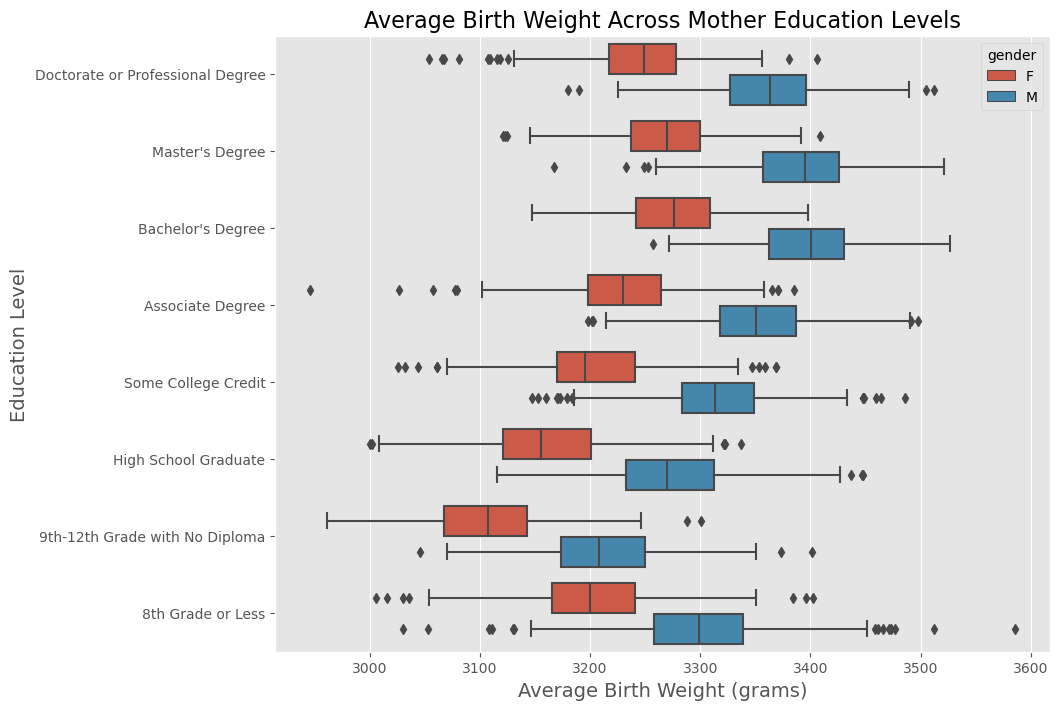

In [27]:
plt.figure(figsize=(10, 8)) 

sns.boxplot(
    data=avg_birth_weight_across_mother_edu,
    x='average_birth_weight_g',
    y='education_level_of_mother',
    hue='gender'
)

plt.xlabel('Average Birth Weight (grams)', fontsize=14)
plt.ylabel('Education Level', fontsize=14)
plt.title('Average Birth Weight Across Mother Education Levels', fontsize=16)


plt.show()


> - From this visualize, higher education have trend to giving birth heavier baby. While boy having more average weight than a girl since this is normal.

### 4. Which state have highest births rate across year? and which state have lowest?
Determining the states with the highest and lowest birth rates across the years can be challenging due to the need to compare birth rates relative to the population of each state. Simply summarizing the total count of births is not sufficient because larger states tend to have higher numbers of births naturally, given their larger populations.

To achieve this, the following steps can be followed:
1. Bring external information in this case I use data from www.statsamerica.org about us population in 2022
1. Create new table and insert data into it.
1. Join new table with dataset we have
1. Create new columns calculate birth rate per 100k population.

> Note: The external data have number of population in 2022, which not same years as our dataset this can lead to bias and unaccurate.

By combining these two statements, we ensure that the `'us_pop'` table is dropped if it exists, providing a fresh start, and then recreated with the desired column structure. This approach allows us to begin populating the `'us_pop'` table with accurate and up-to-date population data for further analysis and exploration

In [28]:
# Check whether table 'us_pop' already created, if it existed delete it.
cursor.execute('DROP TABLE IF EXISTS us_pop;') 

# Create empty table'us_pop'
cursor.execute('''
CREATE TABLE us_pop (
    state TEXT,
    population INTEGER);
''')

# Write SQL to INSERT data into 'us_pop'
query = '''
INSERT INTO us_pop (state, population)
VALUES
    ('California', 39029342),
    ('Texas', 30029572),
    ('Florida', 22244823),
    ('New York', 19677151),
    ('Pennsylvania', 12972008),
    ('Illinois', 12582032),
    ('Ohio', 11756058),
    ('Georgia', 10912876),
    ('North Carolina', 10698973),
    ('Michigan', 10034113),
    ('New Jersey', 9261699),
    ('Virginia', 8683619),
    ('Washington', 7785786),
    ('Arizona', 7359197),
    ('Tennessee', 7051339),
    ('Massachusetts', 6981974),
    ('Indiana', 6833037),
    ('Missouri', 6177957),
    ('Maryland', 6164660),
    ('Wisconsin', 5892539),
    ('Colorado', 5839926),
    ('Minnesota', 5717184),
    ('South Carolina', 5282634),
    ('Alabama', 5074296),
    ('Louisiana', 4590241),
    ('Kentucky', 4512310),
    ('Oregon', 4240137),
    ('Oklahoma', 4019800),
    ('Connecticut', 3626205),
    ('Utah', 3380800),
    ('Iowa', 3200517),
    ('Nevada', 3177772),
    ('Arkansas', 3045637),
    ('Mississippi', 2940057),
    ('Kansas', 2937150),
    ('New Mexico', 2113344),
    ('Nebraska', 1967923),
    ('Idaho', 1939033),
    ('West Virginia', 1775156),
    ('Hawaii', 1440196),
    ('New Hampshire', 1395231),
    ('Maine', 1385340),
    ('Montana', 1122867),
    ('Rhode Island', 1093734),
    ('Delaware', 1018396),
    ('South Dakota', 909824),
    ('North Dakota', 779261),
    ('Alaska', 733583),
    ('District of Columbia', 671803),
    ('Vermont', 647064),
    ('Wyoming', 581381);
'''

# Run the query we just write.
cursor.execute(query)

# Commit the changes to the database
conn.commit()

#### 4.1 Which state have highest births rate across year?

In [29]:
query = '''
SELECT year, state, MAX(births_per_100k) AS highest_births_per_100k
FROM (SELECT births.year, births.state, us_pop.population, (SUM(births.number_of_births) * 100000 / us_pop.population) AS 'births_per_100k'
        FROM births
        LEFT JOIN us_pop ON births.state = us_pop.state
        GROUP BY births.year, births.state)
GROUP BY year;
'''

highest_birth_rate_state_across_year = pd.read_sql(query, conn)

display(highest_birth_rate_state_across_year)

,year,state,highest_births_per_100k
0,2016,Alaska,1527
1,2017,Utah,1437
2,2018,Utah,1396
3,2019,Utah,1385
4,2020,Utah,1351
5,2021,Utah,1381


#### 4.2 Which state have lowest births rate across year?

In [30]:
query = '''
SELECT year, state, MIN(births_per_100k) AS highest_births_per_100k
FROM (
        SELECT 
            births.year,
            births.state, us_pop.population,
            (SUM(births.number_of_births) * 100000 / us_pop.population) AS 'births_per_100k'
        FROM births
        LEFT JOIN us_pop ON births.state = us_pop.state
        GROUP BY births.year, births.state
    )
GROUP BY year;
'''

lowest_birth_rate_state_across_year = pd.read_sql(query, conn)

display(lowest_birth_rate_state_across_year)

,year,state,highest_births_per_100k
0,2016,New Hampshire,879
1,2017,New Hampshire,868
2,2018,Vermont,839
3,2019,Vermont,828
4,2020,Vermont,793
5,2021,Vermont,832


> - From query result said *Alaska* and *Utah* have highest number of new born, while New *Hampshire* and *Vermont* have lowest. 

### 5. What is the average age of mothers across education level?

In [31]:
query = '''
    SELECT education_level_of_mother, AVG(average_age_of_mother_years)
    FROM births
    WHERE education_level_of_mother != 'Unknown'
    GROUP BY education_level_of_mother
    ORDER BY `education_level_code` DESC
'''
avg_age = pd.read_sql(query, conn)

display(avg_age)

,education_level_of_mother,AVG(average_age_of_mother_years)
0,Doctorate or Professional Degree,33.698039
1,Master's Degree,32.781699
2,Bachelor's Degree,31.230229
3,Associate Degree,29.861438
4,Some College Credit,28.068627
5,High School Graduate,26.491993
6,9th-12th Grade with No Diploma,25.064379
7,8th Grade or Less,29.410621


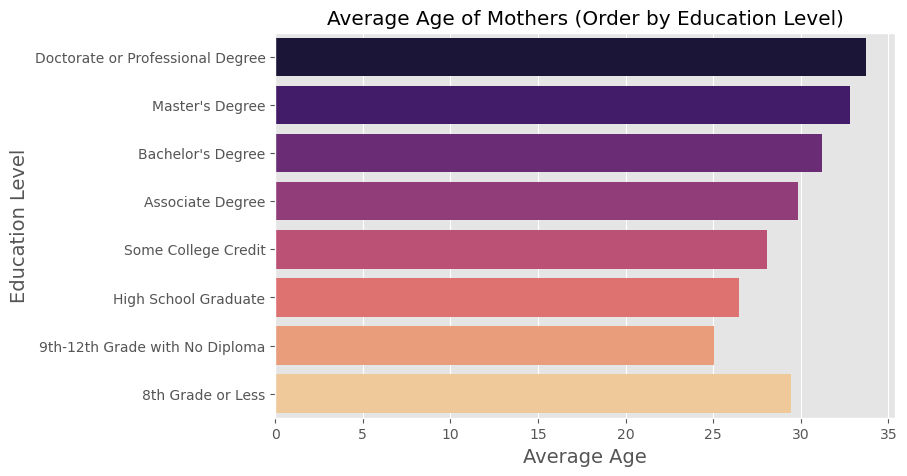

In [32]:
# Set the figure size
plt.figure(figsize=(8, 5))

# Create a bar plot
sns.barplot(data=avg_age, orient='h',
            y=avg_age['education_level_of_mother'],
            x=avg_age['AVG(average_age_of_mother_years)'],
            palette="magma")

# Title and labels
plt.title('Average Age of Mothers (Order by Education Level)')
plt.xlabel('Average Age', fontsize=14)
plt.ylabel('Education Level', fontsize=14)

# Show the plot
plt.show()

> - We can observe a trend indicating that mothers with higher education are more likely to give birth at an older age compared to those with lower education levels. 
> - However,it is interesting to note that mothers with the lowest academic level (8th Grade or Less) tend to have a slower rate of giving birth compared to some higher education ranks.

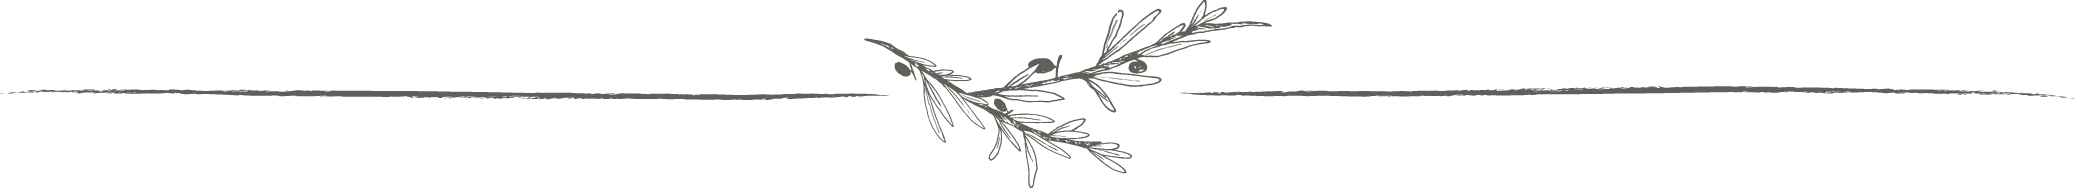

# Step 7: Summary & Insights

1. The data reveals an interesting trend in the number of births over the period from 2016 to 2021, indicating a downward trajectory. This decline in birth rates may be influenced by various factors. :
    * Economically, financial uncertainty and the increasing cost of raising children might be contributing to this trend
    * Societal and cultural changes have resulted in a shift towards smaller family sizes, reflecting evolving norms and attitudes towards family planning.
    * However there are surprice increase in the number of births in 2021. This is worth exploring the specific drivers behind this event.
<br><br>

1. The average weight of newborns follows a normal distribution, but with a slight left skew indicating a slightly higher frequency of underweight babies compared to overweight ones. Most babies fall within a healthy weight range according to **kidshealth.org.**
    * The information from kidshealth.org supports this observation by stating that newborns come in a range of healthy sizes, with most babies born between 5 pounds, 8 ounces (2,500 grams) and 8 pounds, 13 ounces (4,000 grams). Babies weighing below or above this range are still generally considered fine and healthy.
<br><br>

1. There is a positive correlation between maternal education level and birth weight. Higher education levels are associated with better access to healthcare and nutrition, leading to healthier birth weights. The observed trends can cause by following factors:
<br><br>

1. Alaska and Utah have the highest number of newborns, while New Hampshire and Vermont have the lowest. The reasons for these variations may need further analysis.
<br><br>

1. Mothers with higher education levels tend to give birth at older ages, in line with the trend of prioritizing career and personal goals before starting a family.